In [13]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [14]:
import re 
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
city_location = {}

In [15]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info:continue
    city,long,lati = city_info[0]
    city_location[city] = (float(long),float(lati))


In [16]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [17]:
import math 
def geo_distance(origin,destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d 

In [18]:
def get_geo_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])
get_geo_distance('上海','杭州')

153.5185697155768

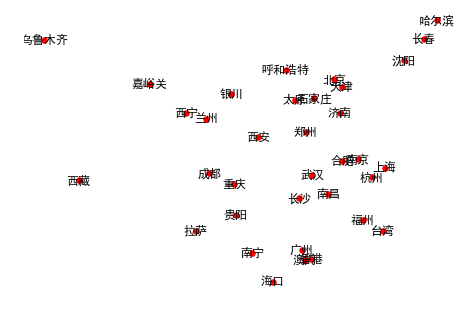

In [19]:
import networkx as nx
cities = list(city_location.keys())
city_graph = nx.Graph()
city_graph.add_nodes_from(cities)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
nx.draw(city_graph,city_location,with_labels=True,node_size=30)
#画的是点状图

In [20]:
simple_connection_info = {
    '北京':['太原','沈阳'],
    '太原':['北京','西安','郑州'],
    '兰州':['西安'],
    '郑州':['北京'],
    '西安':['兰州','长沙'],
    '长沙':['福州','南宁'],
    '沈阳':['北京']
}

G:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


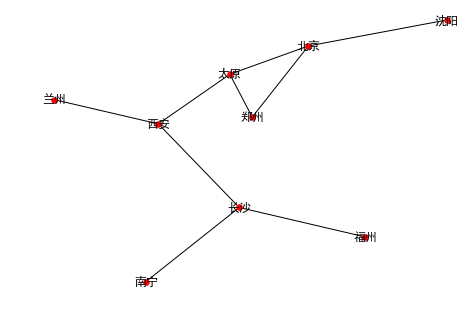

In [21]:
nx.draw(nx.Graph(simple_connection_info),city_location,with_labels=True,node_size=30)

In [35]:
def search1(start,destination,simple_connection_info):
    """深度优先"""
    pathes =[[start]]
    visited = set()  #用来存储考虑过的，即程序自动选择过的路
    while pathes: #当path不为空的时候
        path = pathes.pop(0) #当pop(0)之后该项元素已经被删除了
        frontier = path[-1] #
        if frontier in visited: continue
        success = simple_connection_info[frontier]
        for city in success:
            new_path = path + [city] #北京+太原/沈阳
            pathes.append(new_path) #北京,太原+北京/西安/郑州
            if city == destination: return new_path
        visited.add(frontier)

In [28]:
def transfer_stations_first(pathes):
    return sorted(pathes,key = len)

In [29]:
def shortest_path_first(pathes):
    def get_path_dictance(path):
        distance = 0
        for station in path[:-1]:
            distance+= get_geo_distance(station,path[-1])
    return sorted(pathes,key = get_geo_distance)

In [30]:
search1('北京','长沙',simple_connection_info)

['北京', '太原', '西安', '长沙']

In [31]:
from collections import defaultdict #给字典一个default的类型

In [32]:
simple_connection_info_2 = {
    '北京':['太原','沈阳'],
    '太原':['北京','西安','郑州'],
    '兰州':['西安'],
    '郑州':['北京'],
    '西安':['兰州','长沙'],
    '南宁':['长沙'],
    '福州':['长沙'],
    '长沙':['福州','南宁'],
    '沈阳':['北京']
}

In [33]:
def bfs(graph,start): 
    '''广度优先'''
    visited = [start]
    seen = set()
    while visited:
        frontier = visited.pop() #没有参数，表示默认pop最后一个
        if frontier in seen: continue
        for successor in graph[frontier]:
            print(successor)
            visited.append(successor)
#             visited = visited+[successor] #扩展最新发现的点，深度优先
#             visited = [successor] + visited #每次都薪扩展已经发现的老的点，广度优先
            #所以说，是扩展顺序决定了深度优先还是广度优先
        seen.add(frontier)
    return seen
 

In [34]:
bfs(simple_connection_info_2,'北京')

太原
沈阳
北京
北京
西安
郑州
北京
兰州
长沙
福州
南宁
长沙
长沙
西安


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

In [98]:
from sklearn.datasets import load_boston
data = load_boston
data

<function sklearn.datasets.base.load_boston(return_X_y=False)>

In [99]:
x,y = data['data'],data['target']
x[0]

TypeError: 'function' object is not subscriptable